In [1]:
import numpy as np # NumPy is the fundamental package for scientific computing

import pandas as pd # Pandas is an easy-to-use data structures and data analysis tools
pd.set_option('display.max_columns', None) # To display all columns

import matplotlib.pyplot as plt # Matplotlib is a python 2D plotting library
%matplotlib inline 
# A magic command that tells matplotlib to render figures as static images in the Notebook.

import seaborn as sns # Seaborn is a visualization library based on matplotlib (attractive statistical graphics).
sns.set_style('whitegrid') # One of the five seaborn themes
import warnings
warnings.filterwarnings('ignore') # To ignore some of seaborn warning msg

from scipy import stats, linalg


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import types
import pandas as pd


df_data_1 = pd.read_csv(body)
df_data_1.head()

### Q1.) Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your code in the image.

In [4]:
df_data_1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
print(df_data_1.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


### Q2. Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. 
 make sure the inplace parameter is set to True. 

In [6]:
df_data_1.drop(['id','Unnamed:0'], axis=1, inplace=True)

In [9]:
df_data_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Q3. use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.


In [10]:
df_data_1['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Q4.use the function boxplot in the seaborn library to produce a plot that can be used to determine whether houses with a waterfront view
or without a waterfront view have more price outliers.


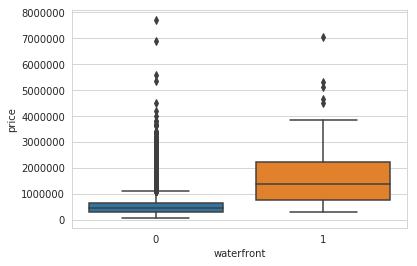

In [11]:
sns.boxplot(x='waterfront', y='price', data=df_data_1)

### Q5. Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. 
 the code used to generate it.

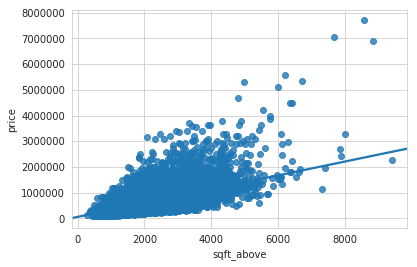

In [12]:
sns.regplot(x='sqft_above', y='price', data=df_data_1, ci=None)

### Q6.Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2. 

In [19]:
X = df_data_1[['sqft_living']]

In [20]:
Y = df_data_1['price']

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
lm.score(X,Y)

0.49285321790379316

### Q7.Fit a linear regression model to predict the 'price' using the list of features:

"floors"
"waterfront"
"lat"
"bedrooms"
"sqft_basement"
"view"
"bathrooms"
"sqft_living15"
"sqft_above"
"grade"
"sqft_living"

the calculate the R^2.



In [150]:
df_data_1features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  

In [151]:
 X=df_data_1[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]] 


In [152]:
Y = df_data_1['price']

In [153]:
lm = LinearRegression()

In [154]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
lm.score(X,Y)

0.6577151058279325

### Q8.Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model.
Fit the object using the features in the question above, then fit the model and calculate the R^2. 


In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [63]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [170]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [66]:
pipe.fit(X,Y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [67]:
pipe.score(X,Y)

0.7513467571646129

### Q9.Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1
and calculate the R^2 using the test data. 



In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
from sklearn.model_selection import train_test_split

In [173]:
from sklearn.linear_model import Ridge

In [164]:
 X=df_data_1[features] 
Y = df_data_1['price']

In [165]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [166]:
print("number of test samples", x_test.shape[0])
print("number of training samples", x_train.shape[0])

number of test samples 3242
number of training samples 18371


In [174]:
RidgeModel = Ridge(alpha = 0.1)


In [175]:
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)

0.6480374087702246

In [169]:
RidgeModel.score(x_test, y_test)

0.6480374087702246

### Q10.Perform a second order polynomial transform on both the training data and testing data. 
Create and fit a Ridge regression object using the training data,
setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided. 



In [143]:
from sklearn.linear_model import Ridge

In [144]:
pr = PolynomialFeatures(degree=2)

In [145]:
x_train_pr = pr.fit_transform(x_train)

In [146]:
x_test_pr = pr.fit_transform(x_test)

In [147]:
poly = Ridge(alpha=0.1)

In [148]:
poly.fit(x_train_pr, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [149]:
poly.score(x_test_pr, y_test)

0.7004432067284855